![image](screen8.png)

Se verrano forniti multimetri analogici per la presa dei dati ricordardi che il terminale "Low gamma , batt" sta per la messa a terra, il numero scritto in nero invece equivale alla portata della scala.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import Tiamat as tiam

Costruire le due configurazioni circuitali , a monte e a valle, usando una resistenza accoppaita in serie al generatore di corrente continua per limitare i carichi nel circuito.
Costruire 2 coppie di vettori (I,V) una per la configurazione a monte e l'altra a valle.
Ricordo che una config a monte ha il voltimetro in parallelo alla resistenza da determianre e che confluisce prima del amperometro, invece nella config a valle, il voltimetro confluisce dopo l'amperometro.
Nell'esempio considerato, il voltimetro possiede un fondo scala pari a 2V e l'amperometro di 500 uA (nano Ampere).

err_I: [5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
err_v:  [0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02]
Slope: 0.002028165017204072, Intercept: -0.0008797133837040172
Matrice di covarianza:
[[ 1.79803325e-09 -1.59786158e-08]
 [-1.59786158e-08  4.13013857e-05]]
Slope: 0.002852853608420346, Intercept: -0.02246068687885261
Matrice di covarianza:
[[ 1.42175210e-09 -1.19127275e-08]
 [-1.19127275e-08  2.88637891e-05]]
Resistenza a monte:  0.0020282061525717355 pm 0.04
Resistenza a valle:  -99.99714714639158 pm 0.04


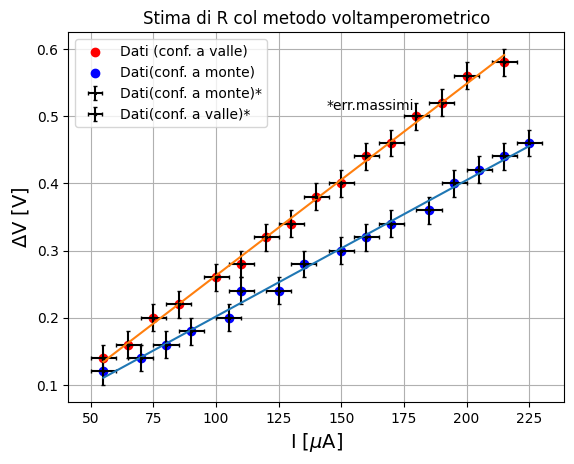

In [8]:
I_m=np.array([2.2, 2.8, 3.2, 3.6, 4.2, 4.4, 5.0, 5.4, 6.0, 6.4, 6.8, 7.4, 7.8, 8.2, 8.6, 9.0])*25
V_m=np.array([0.48, 0.56, 0.64, 0.72, 0.80, 0.96, 0.96, 1.12, 1.20, 1.28, 1.36, 1.44, 1.60, 1.68, 1.76, 1.84])*0.25
I_v=np.array([55, 65, 75, 85, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 215])
V_v=np.array([0.14, 0.16, 0.20, 0.22, 0.26, 0.28, 0.32, 0.34, 0.38, 0.40, 0.44, 0.46, 0.50, 0.52, 0.56, 0.58])   

fs_V=2                              # Fondo scala voltimetro
dV=(fs_V/50)                        # Ci sono 50 tacche sul multimetro , quindi tra una 
                                    # tacca e l'altra vi è una lunghezza pari a 2/50 V
err_V=(dV/2)                        # Considero la mezza tacca come solito fare
err_V=err_V*np.ones(len(V_m))       # Costruisco il vettore di errori sulle V

fs_I=500                            # Fondo scala sulla scala del'amperometro
dI=(fs_I/50)                        # Ci sono 50 tacche sul amperometro, quindi tra una
                                    # tacca e l'altra vi è una lunghezza pari a 500/50 uA (nano Ampere)
err_I=(dI/2)                        # Considero la mezza tacca come solito fare
err_I=err_I*np.ones(len(I_m))       # Costruisco il vettore di errrori sulle I 

print("err_I:" , err_I)
print("err_v: " , err_V)

slope1,intercept1,cov_matrix1 = tiam.fit_lineare(I_m,V_m,err_I,err_V)
slope2,intercept2,cov_matrix2 = tiam.fit_lineare(I_v,V_v,err_I,err_V)

plt.errorbar(I_m, V_m, xerr=err_I, yerr=err_V, fmt='*', markersize=2, capsize=1.5, c='k', label='Dati(conf. a monte)*')
plt.errorbar(I_v, V_v, xerr=err_I, yerr=err_V, fmt='s', markersize=2, capsize=1.5, c='k', label='Dati(conf. a valle)*')

rv = 100
ra = 100

RM = (slope1*rv)/(rv-slope1)
RV = slope2 - ra

print("Resistenza a monte: ",RM, "pm 0.04")
print("Resistenza a valle: ",RV, "pm 0.04")


plt.annotate('*err.massimi',
             xy=(0.52, 0.82), xycoords='axes fraction',
             ha='left', va='top', fontsize=10)

plt.scatter(I_v, V_v, c='r', label='Dati (conf. a valle)')
plt.scatter(I_m, V_m, c='b', label='Dati(conf. a monte)')
plt.plot(I_m,slope1*I_m + intercept1)
plt.plot(I_v,slope2*I_v + intercept2)
plt.legend()
plt.ylabel(r'$\Delta$V [V]', size=14)
plt.xlabel(r'I [$\mu$A]', size=14)
plt.title('Stima di R col metodo voltamperometrico')
plt.grid()
plt.show()


 Una volta prese misure distinte per la configurazione a
 monte e a valle, possiamo graficare i nostri dati e conoscere
 le rispettive stime della resistenza.
 Dai fit dei dati possiamo notare che, come prevedevamo,
 la configurazione a monte da luogo ad una sottostima della
 resistenza, mentre quella a valle genera una sovrastima.
 Il valore di R trovato con il fit a monte risulta essere:

 Rx1 = (Rmonte*r_v)/(r_v-Rmonte) = (2.13 pm 0.04)kohm

 Nella precedente equazione rv `e la resistenza del voltmetro
 e Rx1 il valore calcolato con la configurazione a monte.
 Il
 risultato `e coerente con la sottostima che ci
 aspettavamo.
 Per quanto riguarda la configurazione a valle:

 Rx2 = Rvalle − ra = (2.26K ±0.04)KΩ
 
 Dove ra è la resistenza dell amperometro ed Rx2 e il valore
 calcolato con la configurazione a valle.
 Anche il valore stimato a valle `e in accordo con la sovras
tima che avevamo previsto

Costruire il ponte di whatsone, sempre usando la reistenza accoppiata al generatore e facendo attenzione a collegare un amperometro tra i due nodi anti simetrici al senso del circuito.
Una volta prese le misure della curva R/I abbiamo pro
ceduto prima con un fit di tutte le coppie di punti spe
rimentali, e successivamente con un fit solo delle coppie
 di punti che si trovavano in un intorno dello zero. Abbia
mo fatto ci`o per entrambi i set di misure con fondo-scala
prima di 500 µA, e dopo 50 µA

![image](screen9.png)

Slope: -2.0772727272727276, Intercept: 535.2272727272727
Matrice di covarianza:
[[ 4.29522498e-03 -9.76187495e-02]
 [-9.76187495e-02  2.72746786e+02]]


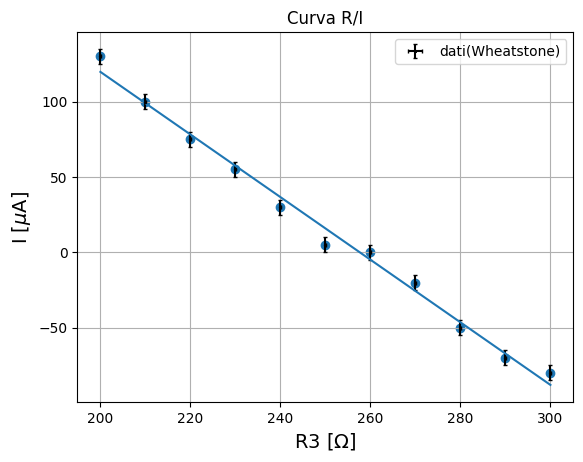

In [5]:
R_w=np.array([200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]) #in ohm
I_w=np.array([130, 100, 75, 55, 30, 5, 0, -20, -50, -70, -80]) #in uA

# Per comprendere il significato di questi errori vedere
# il commento nel primo codice
fs_I=500
dI=(fs_I/50)
err_I=(dI/2)
err_I=err_I*np.ones(len(I_w))

fs_R=300
dR=(fs_R/300)
err_R=(dR/10)
err_R=err_R*np.ones(len(R_w)) 

slope,intercept,cov_matrix=tiam.fit_lineare(R_w,I_w,err_R,err_I)

plt.errorbar(R_w, I_w, xerr=err_R, yerr=err_I, fmt='*', markersize=2, capsize=1.5, c='k', label='dati(Wheatstone)')

plt.legend()
plt.ylabel(r'I [$\mu$A]', size=14)
plt.xlabel(r'R3 [$\Omega$]', size=14)
plt.title('Curva R/I')
plt.grid()
plt.plot(R_w,R_w*slope + intercept)
plt.scatter(R_w,I_w)


Slope: -1.8928571428571428, Intercept: 484.6428571428571
Matrice di covarianza:
[[ 1.45408163e-02 -5.60860058e-01]
 [-5.60860058e-01  1.06584184e+03]]
R4:  14.443154329946784
Incertezza su R4:  3.720649553155199


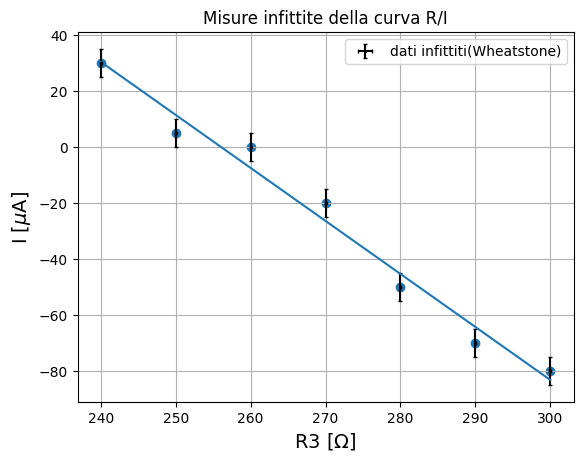

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

R_w2=np.array([240, 250, 260, 270, 280, 290, 300]) #in ohm
I_w2=np.array([ 30, 5, 0, -20, -50, -70, -80]) #in uA

# Per comprendere il significato di questi errori vedere
# il commento nel primo codice
fs_I2=500
dI2=(fs_I2/50)
err_I2=(dI2/2)
err_I2=err_I2*np.ones(len(I_w2))

fs_R2=300
dR2=(fs_R2/300)
err_R2=(dR2/10)
err_R2=err_R2*np.ones(len(R_w2))

slope,intercept,cov_matrix = tiam.fit_lineare(R_w2,I_w2,err_R2,err_I2)

A = slope
B = intercept
R3 = -B/A
SR3 = np.sqrt((1/A**2)*cov_matrix[1][1]+((B**2)/(A**4))*cov_matrix[0][0]+2*(-1/A)*(B/A**2)*cov_matrix[1][0])

# R3 pm SR3 è il valore della resistenza variabile per quale si raggiuge la condizione
# d'equilibrio nel ponte di Wheatsthone

R2 = 2200
R1 = 39000

R4 = (R2*R3)/R1

# Conosco le incertezze statistiche per le varie resistenze, calcolo quindi errori massimi
DR4 = R4*(3*SR3/R3)

print("R4: ",R4)
print("Incertezza su R4: ",DR4)

plt.errorbar(R_w2, I_w2, xerr=err_R2, yerr=err_I2, fmt='*', markersize=2, capsize=1.5, c='k', label='dati infittiti(Wheatstone)')

plt.legend()
plt.ylabel(r'I [$\mu$A]', size=14)
plt.xlabel(r'R3 [$\Omega$]', size=14)
plt.title('Misure infittite della curva R/I')
plt.grid()
plt.plot(R_w2,np.array(R_w2)*slope + intercept)
plt.scatter(R_w2,I_w2)

plt.savefig('CurvaInfittitaRI', dpi=125)
plt.show()

Se non si fosse capito l'ultimo grafico è quello con fondo scala di 50 uA.
Alla fine controllare la consistenza tra i valori ottenuti a monte e a valle e per quanto riguarda il ponte di W. con il valore vero.